In [1]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run all cells',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_all_cells();
        return false;
    }}
);

<IPython.core.display.Javascript object>

In [4]:
import pandas as pd
import numpy as np
import math as m
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

file_name_1 = "2018-1-23_4.delays_gps_reference"
file_name_2 = "2018-1-23_6.delays_gps_reference"

# DataAnalyser2.process_gologic_csv(file_name)
df1 = pd.read_csv("old_data/" + file_name_1 + ".csv", names=["residual_1", "residual_2"], index_col=None)
df1 = df1-100
df1 = df1.shift(-5)

df2 = pd.read_csv("old_data/" + file_name_2 + ".csv", names=["absolute_1", "absolute_2"], index_col=None)
df2 = df2-100
df2 = df2.shift(-8)

df = pd.concat([df1, df2], axis=1)

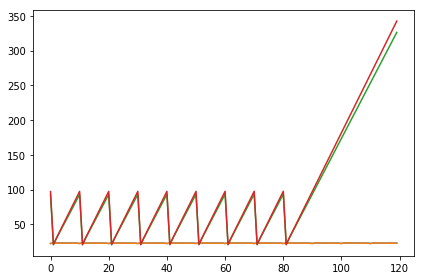

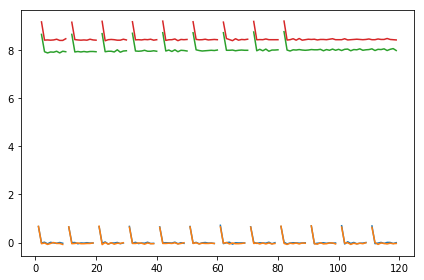

In [17]:
plot_range = 120

# PLOT 1 ---------------------------------------------------------------------------------
# fig = plt.figure(figsize=(15,10))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df.iloc[:plot_range])
plt.tight_layout()
fig.savefig('plots/'+'drift_caused_error.pdf')




# PLOT 2 ---------------------------------------------------------------------------------
drift = df.diff()
# drift = (df.diff())/(10**6) + 1
drift = drift[drift < 10]
drift = drift[drift > -0.25]

# fig = plt.figure(figsize=(15,10))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(drift.iloc[:plot_range])
plt.tight_layout()
fig.savefig('plots/'+'drift_rate_compensation.pdf')
# drift = abs(drift

In [ ]:
# http://bkanuka.com/articles/native-latex-plots/
# Instructions on how to plot with matplotlib to Latex